In [2]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests

In [3]:
#import dataset
NET_data = pd.read_csv('netflix_titles.csv')

In [4]:
#view data
NET_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


# Data Wrangling

In [15]:
#the head function
NET_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
#the tail function
NET_data.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [7]:
#The shape function shows the no. of rows and columns contained in this data
NET_data.shape

(8807, 12)

In [8]:
#The size function shows the size of the data
NET_data.size

105684

In [9]:
#This function is used to show the column name
NET_data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [10]:
#datatypes
NET_data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [11]:
#The info function
NET_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


# Data cleaning

*   Finding duplicate values
*   FInding Null values



In [14]:
NET_data.duplicated() #function to find duplicate values


0       False
1       False
2       False
3       False
4       False
        ...  
8802    False
8803    False
8804    False
8805    False
8806    False
Length: 8807, dtype: bool

*This function only retuned the top 5 rows and the bottom 5 rows its has not give the necessary information required to dictect the duplicate values in a dataset*

In [16]:
NET_data[NET_data.duplicated()] #This formula will only give data that contain duplicate values


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


*No duplicate values are found in the dataset*

# Finding Null values

In [17]:
#Using isnull function will return the a series of boolean values to confirm null areas
NET_data.isnull()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,False,False,False,False,False,False,False,False,False,False,False,False
8803,False,False,False,True,True,True,False,False,False,False,False,False
8804,False,False,False,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False,False,False,False


In [18]:
NET_data.isnull().sum() #this will generate the total of null values in the dataset


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

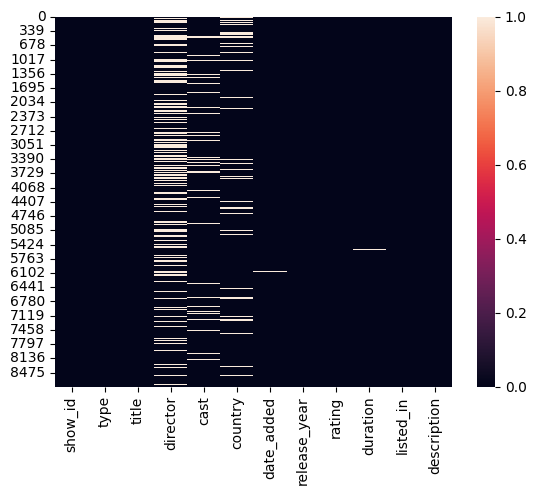

In [19]:
#using seaborn to vizualize the nullvalues in the data set
import matplotlib.pyplot as plt
sns.heatmap(NET_data.isnull())
plt.show()

# For House of Cards,Find the show id and the show's Director

In [21]:
NET_data[NET_data['title'].isin(['House of Cards'])]    #Using the isin() statement to filter the key word


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1059,s1060,TV Show,House of Cards,NaN,"Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,"April 14, 2021",2018,TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...


In [23]:
NET_data[NET_data['title'].str.contains('House of Cards')]    #Using the str.contains() to filter key word


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1059,s1060,TV Show,House of Cards,NaN,"Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,"April 14, 2021",2018,TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...


# How many Tv shows and Movies in the dataset?

In [44]:
NET_data.groupby('type').type.count()


type
Movie      6131
TV Show    2676
Name: type, dtype: int64

<Axes: xlabel='count', ylabel='type'>

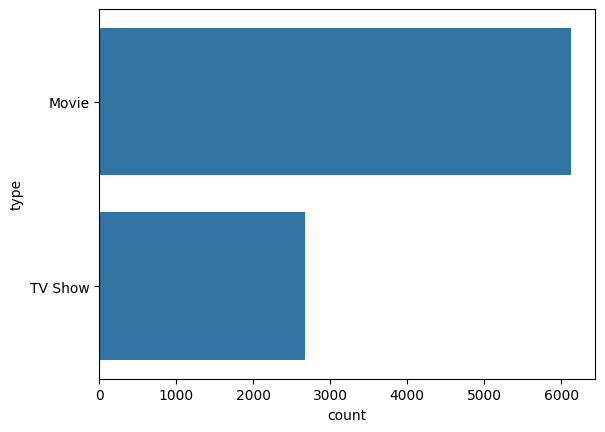

In [45]:
sns.countplot(NET_data['type'])


# What movies where released in year 2000?

In [47]:
NET_data['year']= NET_data['release_year']


In [49]:
NET_data [(NET_data['type']== 'Movie') & (NET_data['year']== 2000)]  #Filtering


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_released,year
180,s181,Movie,The Nutty Professor II: The Klumps,Peter Segal,"Eddie Murphy, Janet Jackson, Larry Miller, Joh...",NaN,"September 1, 2021",2000,PG-13,107 min,"Comedies, Romantic Movies","After getting engaged, Sherman Klump prepares ...",1970-01-01 00:00:00.000002,2000
350,s351,Movie,Space Cowboys,Clint Eastwood,"Clint Eastwood, Tommy Lee Jones, Donald Suther...",United States,"August 1, 2021",2000,PG-13,130 min,"Action & Adventure, Dramas, Sci-Fi & Fantasy",A retired engineer agrees to help NASA prevent...,1970-01-01 00:00:00.000002,2000
359,s360,Movie,The Original Kings of Comedy,Spike Lee,"Steve Harvey, D.L. Hughley, Cedric the Enterta...",United States,"August 1, 2021",2000,R,111 min,Stand-Up Comedy,"Comedians Steve Harvey, Cedric the Entertainer...",1970-01-01 00:00:00.000002,2000
566,s567,Movie,Charlie's Angels,McG,"Cameron Diaz, Drew Barrymore, Lucy Liu, Bill M...","United States, Germany","July 1, 2021",2000,PG-13,98 min,"Action & Adventure, Comedies",A tight-knit trio of specially trained agents ...,1970-01-01 00:00:00.000002,2000
593,s594,Movie,Snow Day,Chris Koch,"Chris Elliott, Mark Webber, Jean Smart, Schuyl...",United States,"July 1, 2021",2000,PG,89 min,"Children & Family Movies, Comedies","When a snow day shuts down the whole town, the...",1970-01-01 00:00:00.000002,2000
779,s780,Movie,Battlefield Earth,Roger Christian,"John Travolta, Barry Pepper, Forest Whitaker, ...",United States,"June 2, 2021",2000,PG-13,118 min,"Action & Adventure, Cult Movies, Sci-Fi & Fantasy","In the year 3000, an alien race known as the P...",1970-01-01 00:00:00.000002,2000
952,s953,Movie,The Whole Nine Yards,Jonathan Lynn,"Bruce Willis, Matthew Perry, Rosanna Arquette,...",United States,"May 1, 2021",2000,R,99 min,"Action & Adventure, Comedies",An unhappily married dentist becomes mixed up ...,1970-01-01 00:00:00.000002,2000
3472,s3473,Movie,Rugrats in Paris: The Movie,"Stig Bergqvist, Paul Demeyer","Elizabeth Daily, Tara Strong, Cheryl Chase, Ch...","Germany, United States","October 1, 2019",2000,G,79 min,"Children & Family Movies, Comedies",The Rugrats take to the big screen and visit P...,1970-01-01 00:00:00.000002,2000
4545,s4546,Movie,Monty Python: Before the Flying Circus,Will Yapp,"Graham Chapman, Eric Idle, Terry Jones, Michae...",United Kingdom,"October 2, 2018",2000,TV-MA,56 min,"Comedies, Documentaries",Discover how six seemingly ordinary but suprem...,1970-01-01 00:00:00.000002,2000
4723,s4724,Movie,Fiza,Khalid Mohamed,"Karisma Kapoor, Jaya Bhaduri, Hrithik Roshan, ...",India,"August 2, 2018",2000,TV-14,163 min,"Dramas, International Movies, Music & Musicals",Fiza's brother disappears during Mumbai's horr...,1970-01-01 00:00:00.000002,2000


# Titles of TV shows released in France


In [50]:
NET_data [(NET_data['type']== 'TV Show') & (NET_data['country']== 'France')] #Filtering


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_released,year
273,s274,TV Show,Gone for Good,Juan Carlos Medina,"Finnegan Oldfield, Nicolas Duvauchelle, Guilla...",France,"August 13, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","Ten years after losing two loved ones, a man i...",1970-01-01 00:00:00.000002021,2021
553,s554,TV Show,Mortel,NaN,"Carl Malapa, Nemo Schiffman, Manon Bresch, Cor...",France,"July 2, 2021",2019,TV-MA,2 Seasons,"Crime TV Shows, International TV Shows, TV Dramas",After making a deal with a supernatural figure...,1970-01-01 00:00:00.000002019,2019
661,s662,TV Show,Call My Agent!,NaN,"Camille Cottin, Thibault De Montalembert, Grég...",France,"June 19, 2021",2018,TV-MA,4 Seasons,"International TV Shows, TV Comedies, TV Dramas","At a top Paris talent firm, agents scramble to...",1970-01-01 00:00:00.000002018,2018
1223,s1224,TV Show,Dealer,"Ange Basterga, Nicolas Lopez","Abdramane Diakité, Mohamed Boudouh, Sébastien ...",France,"March 10, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",Tensions erupt when two filmmakers infiltrate ...,1970-01-01 00:00:00.000002021,2021
1365,s1366,TV Show,Zig & Sharko,NaN,NaN,France,"February 1, 2021",2019,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Zig, an island-bound hyena, will do anything t...",1970-01-01 00:00:00.000002019,2019
1555,s1556,TV Show,Grizzy et les Lemmings,NaN,"Pierre-Alain de Garrigues, Josselin Charier",France,"December 12, 2020",2018,TV-Y,2 Seasons,"Kids' TV, TV Comedies","Strong, whip-smart Grizzy rules a Canadian for...",1970-01-01 00:00:00.000002018,2018
1586,s1587,TV Show,Room 2806: The Accusation,Jalil Lespert,NaN,France,"December 7, 2020",2020,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",This docuseries follows the 2011 sexual assaul...,1970-01-01 00:00:00.000002020,2020
1839,s1840,TV Show,La Révolution,NaN,"Amir El Kacem, Marilou Aussilloux, Lionel Erdo...",France,"October 16, 2020",2020,TV-MA,1 Season,"International TV Shows, TV Action & Adventure,...","In a reimagined history, a mysterious disease ...",1970-01-01 00:00:00.000002020,2020
2008,s2009,TV Show,Family Business,NaN,"Jonathan Cohen, Gérard Darmon, Julia Piaton, L...",France,"September 11, 2020",2020,TV-MA,2 Seasons,"International TV Shows, TV Comedies, TV Dramas",After learning France is about to legalize pot...,1970-01-01 00:00:00.000002020,2020
2069,s2070,TV Show,H,NaN,"Jamel Debbouze, Éric Judor, Ramzy Bedia, Cathe...",France,"September 1, 2020",2002,TV-MA,4 Seasons,"International TV Shows, TV Comedies","At a dysfunctional hospital in Paris, three bu...",1970-01-01 00:00:00.000002002,2002


In [52]:
NET_data [(NET_data['type']== 'TV Show') & (NET_data['country']== 'France')] ['title'] #filtering Titles only


273                             Gone for Good
553                                    Mortel
661                            Call My Agent!
1223                                   Dealer
1365                             Zig & Sharko
1555                   Grizzy et les Lemmings
1586                Room 2806: The Accusation
1839                            La Révolution
2008                          Family Business
2069                                        H
2225                            Gigantosaurus
2318                                   Trotro
2522                        Inhuman Resources
2675                          Fary : Hexagone
2797                                 Vampires
3028                    The Ollie & Moon Show
3040                               Until Dawn
3095                   The Bonfire of Destiny
3119                        Twice Upon A Time
3222                              Mythomaniac
3255               Who Killed Little Gregory?
3328                              

# Top 10 Directors with the highest no. of released TV shows and Movies on Netflix

In [53]:
NET_data['director'].value_counts().head(10)     #using value count function and added head(10) to limit output to 10


director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: count, dtype: int64

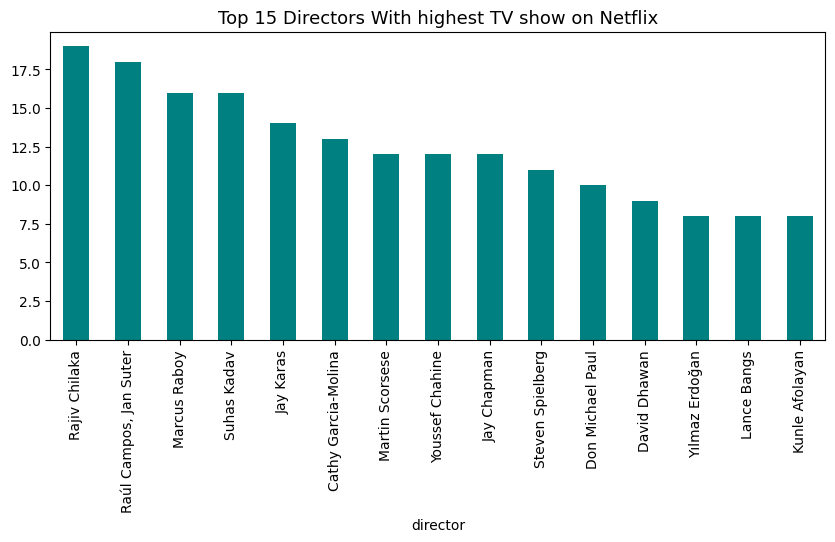

In [54]:
#Plot the bar chart
plt.figure(figsize=(10,4))
NET_data['director'].value_counts().head(15).plot(kind='bar', color='Teal').set_title('Top 15 Directors With highest TV show on Netflix', fontsize=13)
plt.show()

# Show movies released in 2020 in UK


In [55]:
NET_data.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_released,year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",1970-01-01 00:00:00.000002020,2020
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",1970-01-01 00:00:00.000002021,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1970-01-01 00:00:00.000002021,2021
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1970-01-01 00:00:00.000002021,2021
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,1970-01-01 00:00:00.000002021,2021


In [56]:
N_data =NET_data.dropna()


In [59]:
N_data [(N_data['type']== 'Movie') &(N_data['release_year']== 2020) & (N_data['country']== 'United Kingdom')]


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_released,year
945,s946,Movie,Sitting in Limbo,Stella Corradi,"Patrick Robinson, Nadine Marshall, Pippa Benne...",United Kingdom,"May 1, 2021",2020,TV-MA,89 min,"Dramas, International Movies","After living 50 years in the UK, Anthony Bryan...",1970-01-01 00:00:00.000002020,2020
1147,s1148,Movie,Not a Game,Jose Gomez,Brendon Mcdonnell,United Kingdom,"March 31, 2021",2020,TV-MA,98 min,"Documentaries, International Movies, Sports Mo...",This documentary offers an honest look at our ...,1970-01-01 00:00:00.000002020,2020
1312,s1313,Movie,Monsoon,Hong Khaou,"Henry Golding, Parker Sawyers, Molly Harris, D...",United Kingdom,"February 13, 2021",2020,TV-MA,85 min,"Dramas, Independent Movies, LGBTQ Movies",A reflective man must come to terms with his f...,1970-01-01 00:00:00.000002020,2020
1507,s1508,Movie,Shaun the Sheep: The Farmer’s Llamas,Jay Grace,"Justin Fletcher, John Sparkes, Sean Connolly, ...",United Kingdom,"December 22, 2020",2020,TV-Y,28 min,"Children & Family Movies, Comedies",A trio of mischievous llamas from the county f...,1970-01-01 00:00:00.000002020,2020
1512,s1513,Movie,Rhys Nicholson Live at the Athenaeum,Thomas Toby Parkinson,Rhys Nicholson,United Kingdom,"December 20, 2020",2020,TV-MA,66 min,Stand-Up Comedy,Rhys Nicholson flexes his biting humor as he d...,1970-01-01 00:00:00.000002020,2020
1648,s1649,Movie,Ghosts of War,Eric Bress,"Brenton Thwaites, Theo Rossi, Skylar Astin, Ky...",United Kingdom,"November 25, 2020",2020,R,95 min,Horror Movies,"Five, battle-worn Allied soldiers guarding a c...",1970-01-01 00:00:00.000002020,2020
1775,s1776,Movie,His House,Remi Weekes,"Ṣọpẹ́ Dìrísù, Wunmi Mosaku, Matt Smith, Malaik...",United Kingdom,"October 30, 2020",2020,TV-14,93 min,"Horror Movies, Independent Movies",As a young couple from war-torn South Sudan se...,1970-01-01 00:00:00.000002020,2020
1814,s1815,Movie,Rebecca,Ben Wheatley,"Lily James, Armie Hammer, Kristin Scott Thomas...",United Kingdom,"October 21, 2020",2020,PG-13,123 min,"Dramas, Romantic Movies, Thrillers",A young newlywed moves to her husband's imposi...,1970-01-01 00:00:00.000002020,2020
1835,s1836,Movie,I Am Vengeance: Retaliation,Ross Boyask,"Stu Bennett, Vinnie Jones, Mark Griffin, Katri...",United Kingdom,"October 17, 2020",2020,R,82 min,Action & Adventure,"To clear his criminal record, an ex-special fo...",1970-01-01 00:00:00.000002020,2020
1859,s1860,Movie,Octonauts & the Great Barrier Reef,Blair Simmons,"Simon Greenall, Rob Rackstraw, Jo Wyatt, Paul ...",United Kingdom,"October 13, 2020",2020,TV-Y,47 min,Children & Family Movies,"In this musical special, the Octonauts must fi...",1970-01-01 00:00:00.000002020,2020


# How many movies and TVshows was Tom Curies cast in?


In [60]:
N_data [N_data['cast'].str.contains('Tom Cruise') ]


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_released,year
341,s342,Movie,Magnolia,Paul Thomas Anderson,"John C. Reilly, Philip Baker Hall, Tom Cruise,...",United States,"August 1, 2021",1999,R,189 min,"Dramas, Independent Movies","Through chance, history and divine interventio...",1970-01-01 00:00:00.000001999,1999
1254,s1255,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,"March 1, 2021",1988,R,134 min,"Classic Movies, Dramas","Motivated by money, a selfish workaholic seeki...",1970-01-01 00:00:00.000001988,1988


# What are the diffrent ratings defined by Netflix?


In [61]:
NET_data .rating.nunique()


17

# How Many movies have the 'TV-14' rating in Canada?


In [62]:
NET_data .rating.unique()


array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [64]:
NET_data[(NET_data['type'] == 'Movie') & (NET_data['rating'] == 'TV-14') ].shape


(1427, 14)

In [65]:
filtered_data = NET_data[(NET_data['rating']== 'TV-14') & (NET_data['country']== 'Canada')]
print(filtered_data.shape[0])

26


# How Many TV Shows has the "R" Rating after 2018?


In [67]:
NET_data [(NET_data['rating']== 'R') &(NET_data['release_year']> 2018)]


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_released,year
81,s82,Movie,Kate,Cedric Nicolas-Troyan,"Mary Elizabeth Winstead, Jun Kunimura, Woody H...",United States,"September 10, 2021",2021,R,106 min,Action & Adventure,"Slipped a fatal poison on her final job, a rut...",1970-01-01 00:00:00.000002021,2021
214,s215,Movie,SAS: Rise of the Black Swan,Magnus Martens,"Sam Heughan, Ruby Rose, Andy Serkis, Hannah Jo...",NaN,"August 27, 2021",2021,R,124 min,"Action & Adventure, International Movies",A special forces operative traveling from Lond...,1970-01-01 00:00:00.000002021,2021
247,s248,Movie,Sweet Girl,Brian Andrew Mendoza,"Jason Momoa, Isabela Merced, Manuel Garcia-Rul...",United States,"August 20, 2021",2021,R,110 min,"Action & Adventure, Dramas",He lost the love of his life to a pharmaceutic...,1970-01-01 00:00:00.000002021,2021
363,s364,Movie,The Vault,Jaume Balagueró,"Freddie Highmore, Astrid Bergès-Frisbey, Sam R...",NaN,"July 31, 2021",2021,R,118 min,"Action & Adventure, International Movies, Thri...",A genius engineer and his crew of amateur thie...,1970-01-01 00:00:00.000002021,2021
437,s438,Movie,Cosmic Sin,Edward Drake,"Frank Grillo, Bruce Willis, Brandon Thomas Lee...",United States,"July 17, 2021",2021,R,88 min,Action & Adventure,"In the year 2524, a disgraced retired general ...",1970-01-01 00:00:00.000002021,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6286,s6287,Movie,"Berlin, I Love You",NaN,NaN,Germany,"June 8, 2019",2019,R,120 min,"Dramas, International Movies, Romantic Movies","Set in the Grey City, this ""Cities of Love"" in...",1970-01-01 00:00:00.000002019,2019
6623,s6624,Movie,Domino,Brian De Palma,"Nikolaj Coster-Waldau, Carice van Houten, Eriq...","Denmark, France, Belgium, Italy, Netherlands, ...","September 28, 2019",2019,R,89 min,"International Movies, Thrillers",A Copenhagen police officer hunts for the man ...,1970-01-01 00:00:00.000002019,2019
6682,s6683,Movie,Elizabeth Harvest,Sebastian Gutierrez,"Abbey Lee, Ciarán Hinds, Carla Gugino, Matthew...",United States,"August 1, 2020",2019,R,109 min,"Dramas, Sci-Fi & Fantasy",When a young newlywed enters the one chamber i...,1970-01-01 00:00:00.000002019,2019
6713,s6714,Movie,Everybody Knows,Asghar Farhadi,"Penélope Cruz, Javier Bardem, Ricardo Darín, E...","Spain, France, Italy","June 6, 2019",2019,R,133 min,"Dramas, International Movies, Thrillers",Journeying back to her small Spanish hometown ...,1970-01-01 00:00:00.000002019,2019


# What Country has the highest no. of TV shows



In [82]:
NET_data['country'].value_counts()


country
United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 748, dtype: int64

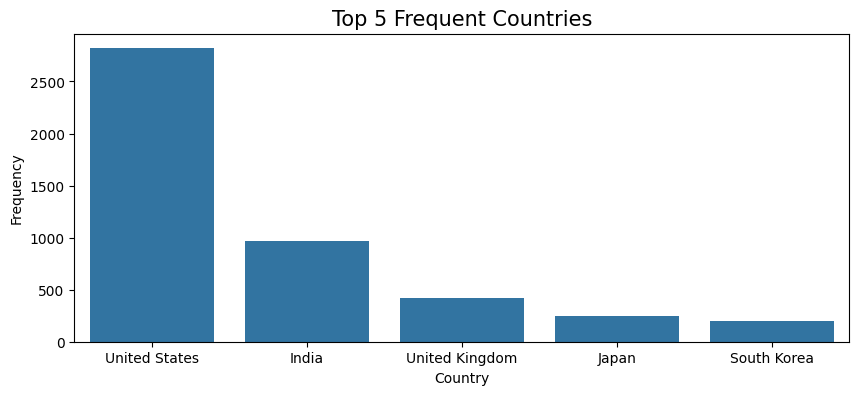

In [83]:
#Plot Bar
plt.figure(figsize=(10,4))
sns.countplot(x='country', data=NET_data, order=NET_data['country'].value_counts().head().index)
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.title("Top 5 Frequent Countries", fontsize=15)
plt.show()


# Sort the Dataset by year


In [84]:
NET_data.sort_values(by = 'release_year').head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_released,year,Minutes,Unit
4250,s4251,TV Show,Pioneers: First Women Filmmakers*,NaN,NaN,NaN,"December 30, 2018",1925,TV-14,1 Season,TV Shows,This collection restores films from women who ...,1970-01-01 00:00:00.000001925,1925,1,Season
7790,s7791,Movie,Prelude to War,Frank Capra,NaN,United States,"March 31, 2017",1942,TV-14,52 min,"Classic Movies, Documentaries",Frank Capra's documentary chronicles the rise ...,1970-01-01 00:00:00.000001942,1942,52,min
8205,s8206,Movie,The Battle of Midway,John Ford,"Henry Fonda, Jane Darwell",United States,"March 31, 2017",1942,TV-14,18 min,"Classic Movies, Documentaries",Director John Ford captures combat footage of ...,1970-01-01 00:00:00.000001942,1942,18,min
8660,s8661,Movie,Undercover: How to Operate Behind Enemy Lines,John Ford,NaN,United States,"March 31, 2017",1943,TV-PG,61 min,"Classic Movies, Documentaries",This World War II-era training film dramatizes...,1970-01-01 00:00:00.000001943,1943,61,min
8739,s8740,Movie,Why We Fight: The Battle of Russia,"Frank Capra, Anatole Litvak",NaN,United States,"March 31, 2017",1943,TV-PG,82 min,Documentaries,This installment of Frank Capra's acclaimed do...,1970-01-01 00:00:00.000001943,1943,82,min


In [86]:
NET_data.sort_values(by = 'release_year', ascending = False).head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_released,year,Minutes,Unit
693,s694,Movie,Ali & Ratu Ratu Queens,Lucky Kuswandi,"Iqbaal Ramadhan, Nirina Zubir, Asri Welas, Tik...",NaN,"June 17, 2021",2021,TV-14,101 min,"Comedies, Dramas, International Movies","After his father's passing, a teenager sets ou...",1970-01-01 00:00:00.000002021,2021,101,min
781,s782,Movie,Black Holes | The Edge of All We Know,Peter Galison,NaN,NaN,"June 2, 2021",2021,TV-14,99 min,Documentaries,Follow scientists on their quest to understand...,1970-01-01 00:00:00.000002021,2021,99,min
762,s763,Movie,Sweet & Sour,Lee Kae-byeok,"Jang Ki-yong, Chae Soo-bin, Jung Soo-jung",South Korea,"June 4, 2021",2021,TV-14,103 min,"Comedies, International Movies, Romantic Movies",Faced with real-world opportunities and challe...,1970-01-01 00:00:00.000002021,2021,103,min
763,s764,TV Show,Sweet Tooth,NaN,"Nonso Anozie, Christian Convery, Adeel Akhtar,...",United States,"June 4, 2021",2021,TV-14,1 Season,"TV Action & Adventure, TV Dramas, TV Sci-Fi & ...",On a perilous adventure across a post-apocalyp...,1970-01-01 00:00:00.000002021,2021,1,Season
764,s765,Movie,Trippin' with the Kandasamys,Jayan Moodley,"Jailoshini Naidoo, Maeshni Naicker, Madhushan ...",South Africa,"June 4, 2021",2021,TV-14,94 min,"Comedies, International Movies, Romantic Movies","To rekindle their marriages, best friends-turn...",1970-01-01 00:00:00.000002021,2021,94,min


# Which year were the higest no. of shows and movie released?


In [87]:
NET_data['release_year'].value_counts()


release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: count, Length: 74, dtype: int64

*Year 2018 has the highest number of movies and show realeses with 1147 in total*


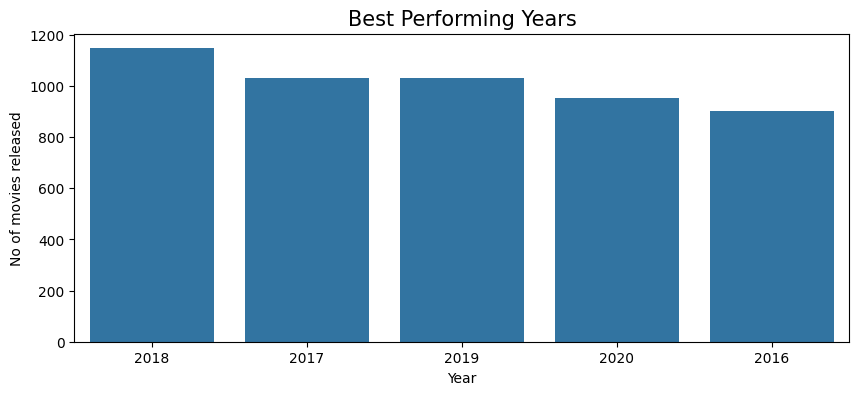

In [96]:
plt.figure(figsize=(10,4))
sns.countplot(x='release_year', data=NET_data, order=NET_data['release_year'].value_counts().head().index)
plt.xlabel("Year")
plt.ylabel("No of movies released")
plt.title("Best Performing Years", fontsize=15)
plt.show()